# Perceptron

Adapted from S. Raschka & V. Mirjalili's Python Machine Learning.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
data = np.array(iris['data'])
target = np.array(iris['target'])
n_samples = data.shape[0]
n_features = data.shape[1]
target_names = iris['target_names']
feature_names = iris['feature_names']

In [6]:
data.shape, target.shape

((150, 4), (150,))

In [7]:
from ml.nn_perceptron import Perceptron
help(Perceptron)

Help on class Perceptron in module ml.nn_perceptron:

class Perceptron(builtins.object)
 |  Perceptron classifier
 |  
 |  Methods defined here:
 |  
 |  __init__(self, n_iterations, learning_rate, activation_function)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  fit(self, training_data, y)
 |  
 |  predict(self, x)
 |      Predict the class of each sample in X
 |      Predicted class of sample x is:
 |          +1  if w^T.x >= 0
 |          -1  otherwise
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



### Step function as the activation function

Note that the implementation of the perceptron learning algorithm used here updates all weights simultaneously (rather than in turn), so that we can used vectorised variables.

In [8]:
perceptron_step = Perceptron(10, 0.05, "step")

In [9]:
y = np.where(target == 0, 1, -1)
perceptron_step.fit(data, y)

In [10]:
perceptron_step.cost_per_iteration

[50, 100, 50, 50, 42, 50, 3, 0, 0, 0]

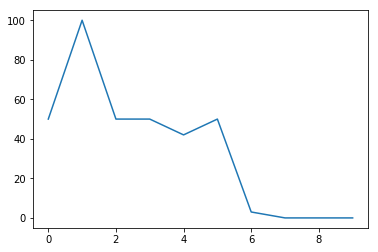

In [11]:
plt.plot(perceptron_step.cost_per_iteration)

### Identity function as activation function

In [12]:
perceptron_adaline = Perceptron(30, 0.0001, "Adaline")

In [13]:
perceptron_adaline.fit(data, y)

In [14]:
perceptron_adaline.cost_per_iteration

[79.2058815571701,
 52.85567098265281,
 49.859962454366,
 47.14387540347067,
 44.59922863862268,
 42.21484268069324,
 39.98062038222078,
 37.887102251139765,
 35.925424703293345,
 34.08728251655021,
 32.36489365671627,
 30.750966319268514,
 29.238668047297764,
 27.821596794868906,
 26.493753813247277,
 25.24951824515927,
 24.083623319489675,
 22.991134045595906,
 21.967426312770712,
 21.008167306335974,
 20.10929715742624,
 19.267011748745595,
 18.477746603477286,
 17.738161789112855,
 17.045127772265676,
 16.395712164561715,
 15.787167303473957,
 15.216918615503197,
 14.68255371242117,
 14.181812174396736]

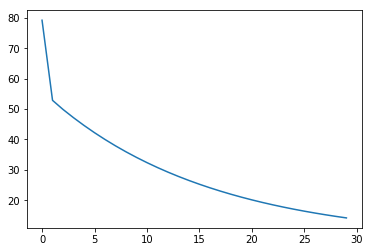

In [15]:
plt.plot(perceptron_adaline.cost_per_iteration)

### Using both training and test sets

In [94]:
# shuffle the training data, not forgetting to keep the data and its classification aligned
unified_dataset = np.concatenate((data, target.reshape(n_samples,1)), axis=1)
np.random.shuffle(unified_dataset)
unified_dataset[:10]

array([[5.6, 3. , 4.5, 1.5, 1. ],
       [4.4, 3.2, 1.3, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [6.8, 3. , 5.5, 2.1, 2. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [6.8, 3.2, 5.9, 2.3, 2. ],
       [6. , 2.9, 4.5, 1.5, 1. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5. , 2.3, 3.3, 1. , 1. ],
       [5.5, 2.4, 3.8, 1.1, 1. ]])

In [95]:
y = np.where(unified_dataset[:,-1] == 0, 1, -1)

In [96]:
n_training = 30

training_set = unified_dataset[:n_training,:-1]
training_y = y[:n_training]

test_set = unified_dataset[n_training:,:-1]
test_y = y[n_training:]

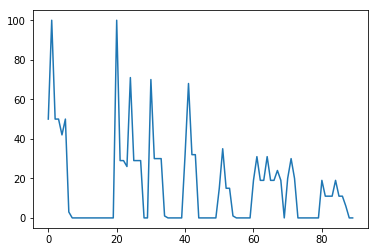

In [97]:
# train perceptron with the step activation function
perceptron_step.fit(training_set, training_y)
plt.plot(perceptron_step.cost_per_iteration)

In [98]:
test_set_extended = np.concatenate((np.ones((test_set.shape[0], 1)), test_set), axis=1)
print("n errors: %i" % (perceptron_step.predict(test_set_extended) - test_y != 0).sum())

n errors: 0


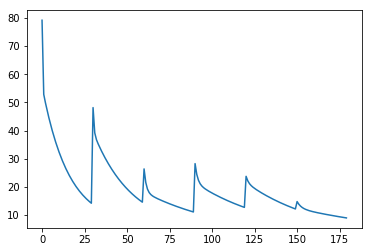

In [99]:
# train perceptron with the step activation function
perceptron_adaline.fit(training_set, training_y)
plt.plot(perceptron_adaline.cost_per_iteration)

In [100]:
test_set_extended = np.concatenate((np.ones((test_set.shape[0], 1)), test_set), axis=1)
print("n errors: %i" % (perceptron_adaline.predict(test_set_extended) - test_y != 0).sum())

n errors: 39


In [101]:
perceptron_step.w, perceptron_adaline.w

(array([  1.09791607,   0.94286063,   6.2040092 , -12.28264378,
         -5.57354624]),
 array([ 0.01128166, -0.01627952,  0.03813344, -0.09706092, -0.05266028]))

In [102]:
test_set_extended[19,:]

array([1. , 6.4, 3.2, 5.3, 2.3])

In [103]:
list(zip(np.dot(test_set_extended, perceptron_step.w), np.dot(test_set_extended, perceptron_adaline.w)))

[(-60.06755442505782, -0.6945393052397933),
 (-34.6746018568631, -0.45701347912369694),
 (5.969041363541454, -0.10113174178282608),
 (-35.1256997185895, -0.46488471494933986),
 (-44.86113762329398, -0.5582178864191664),
 (4.0891362993805895, -0.11447590971829183),
 (-27.093565451287454, -0.3871743591794994),
 (-43.039744158235315, -0.5215223603745762),
 (14.372155038205197, -0.033916735306560086),
 (-56.54115703531727, -0.6455274093203529),
 (-32.145253015856184, -0.4210139543250249),
 (-54.02774682777703, -0.6315514510085409),
 (8.784012065077285, -0.09013550232054812),
 (15.528662715211047, -0.057610967748499275),
 (-49.454995719654086, -0.5813048527424087),
 (-40.19608958859076, -0.500628447011748),
 (-73.08103159197483, -0.8057626959177833),
 (-58.6370469353439, -0.6923728189551064),
 (-51.19464058323518, -0.6175489260210018),
 (-50.932114847217484, -0.606421786351081),
 (4.927718964361841, -0.09617860530774192),
 (-41.7091909531716, -0.5374222989092321),
 (-34.30022127741151, -0.4

In [104]:
list(zip(perceptron_step.predict(test_set_extended), perceptron_adaline.predict(test_set_extended)))

[(-1, -1),
 (-1, -1),
 (1, -1),
 (-1, -1),
 (-1, -1),
 (1, -1),
 (-1, -1),
 (-1, -1),
 (1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (1, -1),
 (1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (1, -1),
 (-1, -1),
 (-1, -1),
 (1, -1),
 (-1, -1),
 (1, -1),
 (-1, -1),
 (1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (1, -1),
 (1, -1),
 (-1, -1),
 (-1, -1),
 (1, -1),
 (-1, -1),
 (-1, -1),
 (1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (1, -1),
 (1, -1),
 (1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (1, -1),
 (-1, -1),
 (1, -1),
 (1, -1),
 (1, -1),
 (1, -1),
 (-1, -1),
 (1, -1),
 (-1, -1),
 (1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (1, -1),
 (-1, -1),
 (1, -1),
 (-1, -1),
 (-1, -1),
 (-1, -1),
 (1, -1),
 (-1, -1),
 (1, -1),
 (-1, -1),
 (-1, -1),
 (1, -1),
 (1, -1),
 (-1, -1),
 (1, -1),
 (1, -1),
 (-1, -1),
 (1, -1),
 (-1, -1),
 (-1, -1),